<a href="https://colab.research.google.com/github/eriksali/DNN_2023_DL/blob/main/a2_autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Assignment #2
## Q1
## To build a MLP model 
## learning_rate:     learning rates [0.1, 0.1e-8]


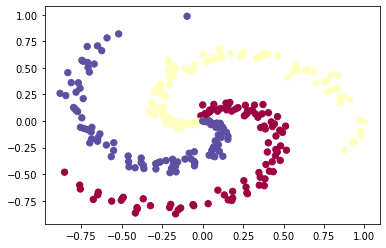

0 tensor(2073.1492, grad_fn=<SumBackward0>)
10000 tensor(133774.1875, grad_fn=<SumBackward0>)
20000 tensor(29900.0156, grad_fn=<SumBackward0>)
30000 tensor(1976.1787, grad_fn=<SumBackward0>)
40000 tensor(1066.7366, grad_fn=<SumBackward0>)
50000 tensor(621.6641, grad_fn=<SumBackward0>)
60000 tensor(403.6760, grad_fn=<SumBackward0>)
70000 tensor(296.7934, grad_fn=<SumBackward0>)
80000 tensor(244.2842, grad_fn=<SumBackward0>)
90000 tensor(218.3833, grad_fn=<SumBackward0>)


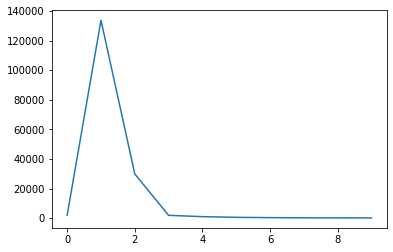

The number of misclassified examples:  tensor(200)


In [79]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

dtype = torch.FloatTensor 
#augment input vectors
x1 = Variable(torch.from_numpy(X).type(dtype), requires_grad = False)
el1 = torch.cat((torch.ones(100),torch.zeros(200)),0)
el2 = torch.cat((torch.zeros(100), torch.ones(100),torch.zeros(100)),0)
el3 = torch.cat((torch.zeros(200),torch.ones(100)),0)
yy  = torch.stack((el1,el2,el3),1)
y1 = Variable(torch.stack((el1,el2,el3),1), requires_grad = False)
h = 50 # size of hidden layer
w1 = Variable(0.5* torch.randn(D,h), requires_grad = True)
b1 = Variable(torch.randn(1,h), requires_grad = True)
w2 = Variable(0.5* torch.randn(h,K), requires_grad = True)
b2 = Variable(torch.randn((1,K)), requires_grad = True)

# some hyperparameters
# learning rates [0.1, 0.1e-8]. 

##learning_rate = 5e-6
learning_rate = 0.5e-3

epochs = 100000
# gradient descent loop
num_examples = x1.shape[0]
loss_values = []
index_batch = []

for i in range(epochs):
##for i in range(30000):
  
  # Forward pass
    hout = x1.mm(w1) + b1
    h_relu = hout.clamp(min=0)
    output = h_relu.mm(w2) + b2# output of NN
    #scores = output.clamp(min=0)
    scores = output
  
  # compute the loss
    loss = (scores - y1).pow(2).sum()
    if i % 10000 == 0:
        print (i, loss)
        ##loss_values.append(loss)
        loss.backward()
        loss_values.append(loss.detach().numpy())
        index_batch.append(i)
        ##plt.plot(i, loss)
        ##plt.show()
    ##loss.backward()
  
  # perform a parameter update
    w2.data -= learning_rate * w2.grad.data
    w1.data -= learning_rate * w1.grad.data
    b2.data -= learning_rate * b2.grad.data
    b1.data -= learning_rate * b1.grad.data
    w1.grad.data.zero_()#Manually zero the gradient after the backward pass
    w2.grad.data.zero_()
    b2.grad.data.zero_()
    b1.grad.data.zero_()

plt.plot(loss_values)
##plt.plot(index_batch, loss_values)
##print(loss_values)
plt.show()

# evaluate training set accuracy
desired_class = torch.cat((torch.zeros(100),torch.ones(100), torch.add(torch.ones(100),1)),0)
hout = x1.mm(w1) + b1
h_relu = hout.clamp(min=0)
output = h_relu.mm(w2) + b2
#scores = output.clamp(min=0)
scores = output
predicted_class = torch.max(scores,1)
predictedClass = np.asarray(predicted_class[1])
predictedTC = torch.FloatTensor(predictedClass)
#print(predicted_class[1])
predicted = torch.squeeze(predictedTC)
err = torch.eq(desired_class, predicted)
error = N*K -torch.sum(err)
print('The number of misclassified examples: ',error)



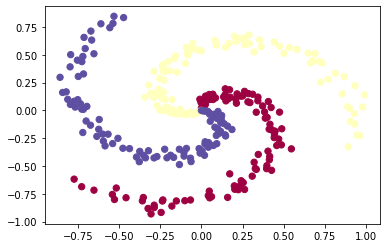

0 tensor(3036.3569, grad_fn=<SumBackward0>)
10000 tensor(2107.8240, grad_fn=<SumBackward0>)
20000 tensor(1450.3525, grad_fn=<SumBackward0>)
30000 tensor(1022.3477, grad_fn=<SumBackward0>)
40000 tensor(774.2233, grad_fn=<SumBackward0>)
50000 tensor(624.1705, grad_fn=<SumBackward0>)
60000 tensor(529.9594, grad_fn=<SumBackward0>)
70000 tensor(464.8917, grad_fn=<SumBackward0>)
80000 tensor(416.6902, grad_fn=<SumBackward0>)
90000 tensor(378.4407, grad_fn=<SumBackward0>)


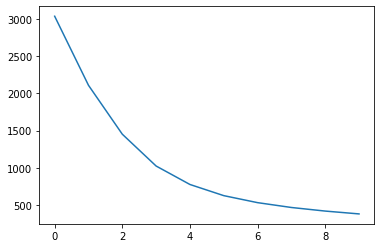

The number of misclassified examples:  tensor(193)


In [78]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

dtype = torch.FloatTensor 
#augment input vectors
x1 = Variable(torch.from_numpy(X).type(dtype), requires_grad = False)
el1 = torch.cat((torch.ones(100),torch.zeros(200)),0)
el2 = torch.cat((torch.zeros(100), torch.ones(100),torch.zeros(100)),0)
el3 = torch.cat((torch.zeros(200),torch.ones(100)),0)
yy  = torch.stack((el1,el2,el3),1)
y1 = Variable(torch.stack((el1,el2,el3),1), requires_grad = False)
h = 50 # size of hidden layer
w1 = Variable(0.5* torch.randn(D,h), requires_grad = True)
b1 = Variable(torch.randn(1,h), requires_grad = True)
w2 = Variable(0.5* torch.randn(h,K), requires_grad = True)
b2 = Variable(torch.randn((1,K)), requires_grad = True)

# some hyperparameters
# learning rates [0.1, 0.1e-8]. 

##learning_rate = 5e-6
learning_rate = 0.1e-3

epochs = 100000
# gradient descent loop
num_examples = x1.shape[0]
loss_values = []
index_batch = []

for i in range(epochs):
##for i in range(30000):
  
  # Forward pass
    hout = x1.mm(w1) + b1
    h_relu = hout.clamp(min=0)
    output = h_relu.mm(w2) + b2# output of NN
    #scores = output.clamp(min=0)
    scores = output
  
  # compute the loss
    loss = (scores - y1).pow(2).sum()
    if i % 10000 == 0:
        print (i, loss)
        ##loss_values.append(loss)
        loss.backward()
        loss_values.append(loss.detach().numpy())
        index_batch.append(i)
        ##plt.plot(i, loss)
        ##plt.show()
    ##loss.backward()
  
  # perform a parameter update
    w2.data -= learning_rate * w2.grad.data
    w1.data -= learning_rate * w1.grad.data
    b2.data -= learning_rate * b2.grad.data
    b1.data -= learning_rate * b1.grad.data
    w1.grad.data.zero_()#Manually zero the gradient after the backward pass
    w2.grad.data.zero_()
    b2.grad.data.zero_()
    b1.grad.data.zero_()

plt.plot(loss_values)
##plt.plot(index_batch, loss_values)
##print(loss_values)
plt.show()

# evaluate training set accuracy
desired_class = torch.cat((torch.zeros(100),torch.ones(100), torch.add(torch.ones(100),1)),0)
hout = x1.mm(w1) + b1
h_relu = hout.clamp(min=0)
output = h_relu.mm(w2) + b2
#scores = output.clamp(min=0)
scores = output
predicted_class = torch.max(scores,1)
predictedClass = np.asarray(predicted_class[1])
predictedTC = torch.FloatTensor(predictedClass)
#print(predicted_class[1])
predicted = torch.squeeze(predictedTC)
err = torch.eq(desired_class, predicted)
error = N*K -torch.sum(err)
print('The number of misclassified examples: ',error)



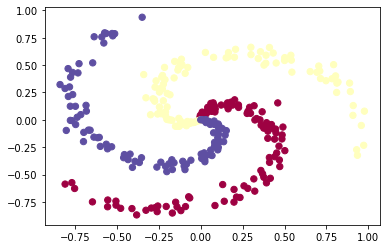

0 tensor(6316.8008, grad_fn=<SumBackward0>)
10000 tensor(1.3989e+09, grad_fn=<SumBackward0>)
20000 tensor(5.0155e+10, grad_fn=<SumBackward0>)
30000 tensor(1.2539e+12, grad_fn=<SumBackward0>)
40000 tensor(3.1347e+13, grad_fn=<SumBackward0>)
50000 tensor(7.8367e+14, grad_fn=<SumBackward0>)
60000 tensor(1.9592e+16, grad_fn=<SumBackward0>)
70000 tensor(4.8979e+17, grad_fn=<SumBackward0>)
80000 tensor(1.2245e+19, grad_fn=<SumBackward0>)
90000 tensor(3.0612e+20, grad_fn=<SumBackward0>)


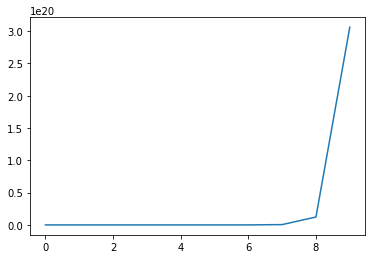

The number of misclassified examples:  tensor(200)


In [77]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

dtype = torch.FloatTensor 
#augment input vectors
x1 = Variable(torch.from_numpy(X).type(dtype), requires_grad = False)
el1 = torch.cat((torch.ones(100),torch.zeros(200)),0)
el2 = torch.cat((torch.zeros(100), torch.ones(100),torch.zeros(100)),0)
el3 = torch.cat((torch.zeros(200),torch.ones(100)),0)
yy  = torch.stack((el1,el2,el3),1)
y1 = Variable(torch.stack((el1,el2,el3),1), requires_grad = False)
h = 50 # size of hidden layer
w1 = Variable(0.5* torch.randn(D,h), requires_grad = True)
b1 = Variable(torch.randn(1,h), requires_grad = True)
w2 = Variable(0.5* torch.randn(h,K), requires_grad = True)
b2 = Variable(torch.randn((1,K)), requires_grad = True)

# some hyperparameters
# learning rates [0.1, 0.1e-8]. 

##learning_rate = 5e-6
learning_rate = 0.1e-1

epochs = 100000
# gradient descent loop
num_examples = x1.shape[0]
loss_values = []
index_batch = []

for i in range(epochs):
##for i in range(30000):
  
  # Forward pass
    hout = x1.mm(w1) + b1
    h_relu = hout.clamp(min=0)
    output = h_relu.mm(w2) + b2# output of NN
    #scores = output.clamp(min=0)
    scores = output
  
  # compute the loss
    loss = (scores - y1).pow(2).sum()
    if i % 10000 == 0:
        print (i, loss)
        ##loss_values.append(loss)
        loss.backward()
        loss_values.append(loss.detach().numpy())
        index_batch.append(i)
        ##plt.plot(i, loss)
        ##plt.show()
    ##loss.backward()
  
  # perform a parameter update
    w2.data -= learning_rate * w2.grad.data
    w1.data -= learning_rate * w1.grad.data
    b2.data -= learning_rate * b2.grad.data
    b1.data -= learning_rate * b1.grad.data
    w1.grad.data.zero_()#Manually zero the gradient after the backward pass
    w2.grad.data.zero_()
    b2.grad.data.zero_()
    b1.grad.data.zero_()

plt.plot(loss_values)
##plt.plot(index_batch, loss_values)
##print(loss_values)
plt.show()

# evaluate training set accuracy
desired_class = torch.cat((torch.zeros(100),torch.ones(100), torch.add(torch.ones(100),1)),0)
hout = x1.mm(w1) + b1
h_relu = hout.clamp(min=0)
output = h_relu.mm(w2) + b2
#scores = output.clamp(min=0)
scores = output
predicted_class = torch.max(scores,1)
predictedClass = np.asarray(predicted_class[1])
predictedTC = torch.FloatTensor(predictedClass)
#print(predicted_class[1])
predicted = torch.squeeze(predictedTC)
err = torch.eq(desired_class, predicted)
error = N*K -torch.sum(err)
print('The number of misclassified examples: ',error)



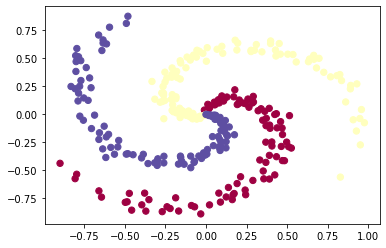

0 tensor(11585.1748, grad_fn=<SumBackward0>)
10000 tensor(1793272.5000, grad_fn=<SumBackward0>)
20000 tensor(527682.8750, grad_fn=<SumBackward0>)
30000 tensor(80746.6875, grad_fn=<SumBackward0>)
40000 tensor(13087.4707, grad_fn=<SumBackward0>)
50000 tensor(2261.9956, grad_fn=<SumBackward0>)
60000 tensor(529.9192, grad_fn=<SumBackward0>)
70000 tensor(252.7870, grad_fn=<SumBackward0>)
80000 tensor(208.4460, grad_fn=<SumBackward0>)
90000 tensor(201.3514, grad_fn=<SumBackward0>)


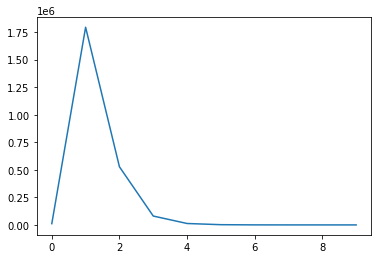

The number of misclassified examples:  tensor(200)


In [76]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

dtype = torch.FloatTensor 
#augment input vectors
x1 = Variable(torch.from_numpy(X).type(dtype), requires_grad = False)
el1 = torch.cat((torch.ones(100),torch.zeros(200)),0)
el2 = torch.cat((torch.zeros(100), torch.ones(100),torch.zeros(100)),0)
el3 = torch.cat((torch.zeros(200),torch.ones(100)),0)
yy  = torch.stack((el1,el2,el3),1)
y1 = Variable(torch.stack((el1,el2,el3),1), requires_grad = False)
h = 50 # size of hidden layer
w1 = Variable(0.5* torch.randn(D,h), requires_grad = True)
b1 = Variable(torch.randn(1,h), requires_grad = True)
w2 = Variable(0.5* torch.randn(h,K), requires_grad = True)
b2 = Variable(torch.randn((1,K)), requires_grad = True)

# some hyperparameters
# learning rates [0.1, 0.1e-8]. 

##learning_rate = 5e-6
learning_rate = 0.1e-2

epochs = 100000
# gradient descent loop
num_examples = x1.shape[0]
loss_values = []
index_batch = []

for i in range(epochs):
##for i in range(30000):
  
  # Forward pass
    hout = x1.mm(w1) + b1
    h_relu = hout.clamp(min=0)
    output = h_relu.mm(w2) + b2# output of NN
    #scores = output.clamp(min=0)
    scores = output
  
  # compute the loss
    loss = (scores - y1).pow(2).sum()
    if i % 10000 == 0:
        print (i, loss)
        ##loss_values.append(loss)
        loss.backward()
        loss_values.append(loss.detach().numpy())
        index_batch.append(i)
        ##plt.plot(i, loss)
        ##plt.show()
    ##loss.backward()
  
  # perform a parameter update
    w2.data -= learning_rate * w2.grad.data
    w1.data -= learning_rate * w1.grad.data
    b2.data -= learning_rate * b2.grad.data
    b1.data -= learning_rate * b1.grad.data
    w1.grad.data.zero_()#Manually zero the gradient after the backward pass
    w2.grad.data.zero_()
    b2.grad.data.zero_()
    b1.grad.data.zero_()

plt.plot(loss_values)
##plt.plot(index_batch, loss_values)
##print(loss_values)
plt.show()

# evaluate training set accuracy
desired_class = torch.cat((torch.zeros(100),torch.ones(100), torch.add(torch.ones(100),1)),0)
hout = x1.mm(w1) + b1
h_relu = hout.clamp(min=0)
output = h_relu.mm(w2) + b2
#scores = output.clamp(min=0)
scores = output
predicted_class = torch.max(scores,1)
predictedClass = np.asarray(predicted_class[1])
predictedTC = torch.FloatTensor(predictedClass)
#print(predicted_class[1])
predicted = torch.squeeze(predictedTC)
err = torch.eq(desired_class, predicted)
error = N*K -torch.sum(err)
print('The number of misclassified examples: ',error)



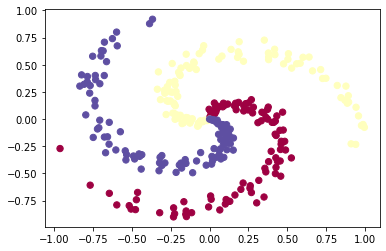

0 tensor(2144.6362, grad_fn=<SumBackward0>)
10000 tensor(1679.3176, grad_fn=<SumBackward0>)
20000 tensor(1328.7657, grad_fn=<SumBackward0>)
30000 tensor(1063.7909, grad_fn=<SumBackward0>)
40000 tensor(863.1295, grad_fn=<SumBackward0>)
50000 tensor(710.8383, grad_fn=<SumBackward0>)
60000 tensor(595.0662, grad_fn=<SumBackward0>)
70000 tensor(506.9191, grad_fn=<SumBackward0>)
80000 tensor(439.6893, grad_fn=<SumBackward0>)
90000 tensor(388.3063, grad_fn=<SumBackward0>)


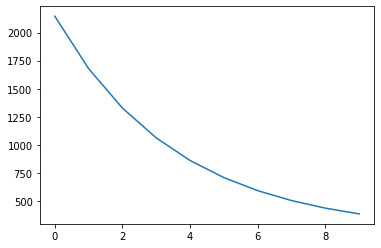

The number of misclassified examples:  tensor(132)


In [75]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

dtype = torch.FloatTensor 
#augment input vectors
x1 = Variable(torch.from_numpy(X).type(dtype), requires_grad = False)
el1 = torch.cat((torch.ones(100),torch.zeros(200)),0)
el2 = torch.cat((torch.zeros(100), torch.ones(100),torch.zeros(100)),0)
el3 = torch.cat((torch.zeros(200),torch.ones(100)),0)
yy  = torch.stack((el1,el2,el3),1)
y1 = Variable(torch.stack((el1,el2,el3),1), requires_grad = False)
h = 50 # size of hidden layer
w1 = Variable(0.5* torch.randn(D,h), requires_grad = True)
b1 = Variable(torch.randn(1,h), requires_grad = True)
w2 = Variable(0.5* torch.randn(h,K), requires_grad = True)
b2 = Variable(torch.randn((1,K)), requires_grad = True)

# some hyperparameters
# learning rates [0.1, 0.1e-8]. 

##learning_rate = 5e-6
learning_rate = 0.1e-4

epochs = 100000
# gradient descent loop
num_examples = x1.shape[0]
loss_values = []
index_batch = []

for i in range(epochs):
##for i in range(30000):
  
  # Forward pass
    hout = x1.mm(w1) + b1
    h_relu = hout.clamp(min=0)
    output = h_relu.mm(w2) + b2# output of NN
    #scores = output.clamp(min=0)
    scores = output
  
  # compute the loss
    loss = (scores - y1).pow(2).sum()
    if i % 10000 == 0:
        print (i, loss)
        ##loss_values.append(loss)
        loss.backward()
        loss_values.append(loss.detach().numpy())
        index_batch.append(i)
        ##plt.plot(i, loss)
        ##plt.show()
    ##loss.backward()
  
  # perform a parameter update
    w2.data -= learning_rate * w2.grad.data
    w1.data -= learning_rate * w1.grad.data
    b2.data -= learning_rate * b2.grad.data
    b1.data -= learning_rate * b1.grad.data
    w1.grad.data.zero_()#Manually zero the gradient after the backward pass
    w2.grad.data.zero_()
    b2.grad.data.zero_()
    b1.grad.data.zero_()

plt.plot(loss_values)
##plt.plot(index_batch, loss_values)
##print(loss_values)
plt.show()

# evaluate training set accuracy
desired_class = torch.cat((torch.zeros(100),torch.ones(100), torch.add(torch.ones(100),1)),0)
hout = x1.mm(w1) + b1
h_relu = hout.clamp(min=0)
output = h_relu.mm(w2) + b2
#scores = output.clamp(min=0)
scores = output
predicted_class = torch.max(scores,1)
predictedClass = np.asarray(predicted_class[1])
predictedTC = torch.FloatTensor(predictedClass)
#print(predicted_class[1])
predicted = torch.squeeze(predictedTC)
err = torch.eq(desired_class, predicted)
error = N*K -torch.sum(err)
print('The number of misclassified examples: ',error)



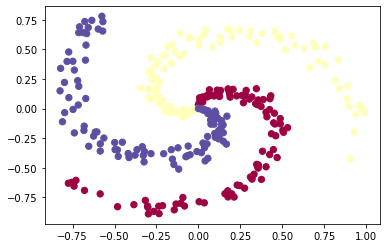

0 tensor(6397.8848, grad_fn=<SumBackward0>)
10000 tensor(6371.9697, grad_fn=<SumBackward0>)
20000 tensor(6346.1816, grad_fn=<SumBackward0>)
30000 tensor(6320.5181, grad_fn=<SumBackward0>)
40000 tensor(6294.9805, grad_fn=<SumBackward0>)
50000 tensor(6269.5679, grad_fn=<SumBackward0>)
60000 tensor(6244.2798, grad_fn=<SumBackward0>)
70000 tensor(6219.1162, grad_fn=<SumBackward0>)
80000 tensor(6194.0757, grad_fn=<SumBackward0>)
90000 tensor(6169.1567, grad_fn=<SumBackward0>)


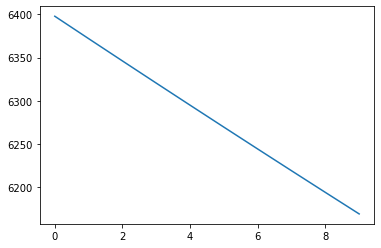

The number of misclassified examples:  tensor(213)


In [74]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

dtype = torch.FloatTensor 
#augment input vectors
x1 = Variable(torch.from_numpy(X).type(dtype), requires_grad = False)
el1 = torch.cat((torch.ones(100),torch.zeros(200)),0)
el2 = torch.cat((torch.zeros(100), torch.ones(100),torch.zeros(100)),0)
el3 = torch.cat((torch.zeros(200),torch.ones(100)),0)
yy  = torch.stack((el1,el2,el3),1)
y1 = Variable(torch.stack((el1,el2,el3),1), requires_grad = False)
h = 50 # size of hidden layer
w1 = Variable(0.5* torch.randn(D,h), requires_grad = True)
b1 = Variable(torch.randn(1,h), requires_grad = True)
w2 = Variable(0.5* torch.randn(h,K), requires_grad = True)
b2 = Variable(torch.randn((1,K)), requires_grad = True)

# some hyperparameters
# learning rates [0.1, 0.1e-8]. 

##learning_rate = 5e-6
learning_rate = 0.1e-6

epochs = 100000
# gradient descent loop
num_examples = x1.shape[0]
loss_values = []
index_batch = []

for i in range(epochs):
##for i in range(30000):
  
  # Forward pass
    hout = x1.mm(w1) + b1
    h_relu = hout.clamp(min=0)
    output = h_relu.mm(w2) + b2# output of NN
    #scores = output.clamp(min=0)
    scores = output
  
  # compute the loss
    loss = (scores - y1).pow(2).sum()
    if i % 10000 == 0:
        print (i, loss)
        ##loss_values.append(loss)
        loss.backward()
        loss_values.append(loss.detach().numpy())
        index_batch.append(i)
        ##plt.plot(i, loss)
        ##plt.show()
    ##loss.backward()
  
  # perform a parameter update
    w2.data -= learning_rate * w2.grad.data
    w1.data -= learning_rate * w1.grad.data
    b2.data -= learning_rate * b2.grad.data
    b1.data -= learning_rate * b1.grad.data
    w1.grad.data.zero_()#Manually zero the gradient after the backward pass
    w2.grad.data.zero_()
    b2.grad.data.zero_()
    b1.grad.data.zero_()

plt.plot(loss_values)
##plt.plot(index_batch, loss_values)
##print(loss_values)
plt.show()

# evaluate training set accuracy
desired_class = torch.cat((torch.zeros(100),torch.ones(100), torch.add(torch.ones(100),1)),0)
hout = x1.mm(w1) + b1
h_relu = hout.clamp(min=0)
output = h_relu.mm(w2) + b2
#scores = output.clamp(min=0)
scores = output
predicted_class = torch.max(scores,1)
predictedClass = np.asarray(predicted_class[1])
predictedTC = torch.FloatTensor(predictedClass)
#print(predicted_class[1])
predicted = torch.squeeze(predictedTC)
err = torch.eq(desired_class, predicted)
error = N*K -torch.sum(err)
print('The number of misclassified examples: ',error)



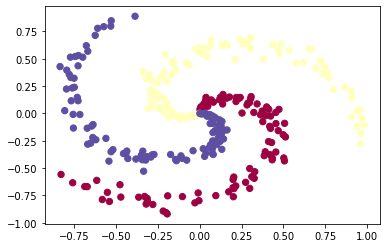

0 tensor(880.1526, grad_fn=<SumBackward0>)
10000 tensor(880.1435, grad_fn=<SumBackward0>)
20000 tensor(880.1345, grad_fn=<SumBackward0>)
30000 tensor(880.1254, grad_fn=<SumBackward0>)
40000 tensor(880.1163, grad_fn=<SumBackward0>)
50000 tensor(880.1072, grad_fn=<SumBackward0>)
60000 tensor(880.0983, grad_fn=<SumBackward0>)
70000 tensor(880.0892, grad_fn=<SumBackward0>)
80000 tensor(880.0801, grad_fn=<SumBackward0>)
90000 tensor(880.0711, grad_fn=<SumBackward0>)


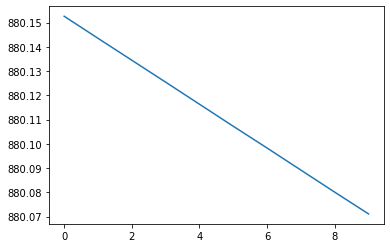

The number of misclassified examples:  tensor(235)


In [73]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

dtype = torch.FloatTensor 
#augment input vectors
x1 = Variable(torch.from_numpy(X).type(dtype), requires_grad = False)
el1 = torch.cat((torch.ones(100),torch.zeros(200)),0)
el2 = torch.cat((torch.zeros(100), torch.ones(100),torch.zeros(100)),0)
el3 = torch.cat((torch.zeros(200),torch.ones(100)),0)
yy  = torch.stack((el1,el2,el3),1)
y1 = Variable(torch.stack((el1,el2,el3),1), requires_grad = False)
h = 50 # size of hidden layer
w1 = Variable(0.5* torch.randn(D,h), requires_grad = True)
b1 = Variable(torch.randn(1,h), requires_grad = True)
w2 = Variable(0.5* torch.randn(h,K), requires_grad = True)
b2 = Variable(torch.randn((1,K)), requires_grad = True)

# some hyperparameters
# learning rates [0.1, 0.1e-8]. 

##learning_rate = 5e-6
learning_rate = 0.1e-8

epochs = 100000
# gradient descent loop
num_examples = x1.shape[0]
loss_values = []
index_batch = []

for i in range(epochs):
##for i in range(30000):
  
  # Forward pass
    hout = x1.mm(w1) + b1
    h_relu = hout.clamp(min=0)
    output = h_relu.mm(w2) + b2# output of NN
    #scores = output.clamp(min=0)
    scores = output
  
  # compute the loss
    loss = (scores - y1).pow(2).sum()
    if i % 10000 == 0:
        print (i, loss)
        ##loss_values.append(loss)
        loss.backward()
        loss_values.append(loss.detach().numpy())
        index_batch.append(i)
        ##plt.plot(i, loss)
        ##plt.show()
    ##loss.backward()
  
  # perform a parameter update
    w2.data -= learning_rate * w2.grad.data
    w1.data -= learning_rate * w1.grad.data
    b2.data -= learning_rate * b2.grad.data
    b1.data -= learning_rate * b1.grad.data
    w1.grad.data.zero_()#Manually zero the gradient after the backward pass
    w2.grad.data.zero_()
    b2.grad.data.zero_()
    b1.grad.data.zero_()

plt.plot(loss_values)
##plt.plot(index_batch, loss_values)
##print(loss_values)
plt.show()

# evaluate training set accuracy
desired_class = torch.cat((torch.zeros(100),torch.ones(100), torch.add(torch.ones(100),1)),0)
hout = x1.mm(w1) + b1
h_relu = hout.clamp(min=0)
output = h_relu.mm(w2) + b2
#scores = output.clamp(min=0)
scores = output
predicted_class = torch.max(scores,1)
predictedClass = np.asarray(predicted_class[1])
predictedTC = torch.FloatTensor(predictedClass)
#print(predicted_class[1])
predicted = torch.squeeze(predictedTC)
err = torch.eq(desired_class, predicted)
error = N*K -torch.sum(err)
print('The number of misclassified examples: ',error)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

dtype = torch.FloatTensor 
#augment input vectors
x1 = Variable(torch.from_numpy(X).type(dtype), requires_grad = False)
el1 = torch.cat((torch.ones(100),torch.zeros(200)),0)
el2 = torch.cat((torch.zeros(100), torch.ones(100),torch.zeros(100)),0)
el3 = torch.cat((torch.zeros(200),torch.ones(100)),0)
yy  = torch.stack((el1,el2,el3),1)
y1 = Variable(torch.stack((el1,el2,el3),1), requires_grad = False)
h = 50 # size of hidden layer
w1 = Variable(0.5* torch.randn(D,h), requires_grad = True)
b1 = Variable(torch.randn(1,h), requires_grad = True)
w2 = Variable(0.5* torch.randn(h,K), requires_grad = True)
b2 = Variable(torch.randn((1,K)), requires_grad = True)

# some hyperparameters
# learning rates [0.1, 0.1e-8]. 

##learning_rate = 5e-6
learning_rate = 0.1

epochs = 100000
# gradient descent loop
num_examples = x1.shape[0]
loss_values = []
index_batch = []

for i in range(epochs):
##for i in range(30000):
  
  # Forward pass
    hout = x1.mm(w1) + b1
    h_relu = hout.clamp(min=0)
    output = h_relu.mm(w2) + b2# output of NN
    #scores = output.clamp(min=0)
    scores = output
  
  # compute the loss
    loss = (scores - y1).pow(2).sum()
    if i % 10000 == 0:
        print (i, loss)
        ##loss_values.append(loss)
        loss.backward()
        loss_values.append(loss.detach().numpy())
        index_batch.append(i)
        ##plt.plot(i, loss)
        ##plt.show()
    ##loss.backward()
  
  # perform a parameter update
    w2.data -= learning_rate * w2.grad.data
    w1.data -= learning_rate * w1.grad.data
    b2.data -= learning_rate * b2.grad.data
    b1.data -= learning_rate * b1.grad.data
    w1.grad.data.zero_()#Manually zero the gradient after the backward pass
    w2.grad.data.zero_()
    b2.grad.data.zero_()
    b1.grad.data.zero_()

plt.plot(loss_values)
##plt.plot(index_batch, loss_values)
##print(loss_values)
plt.show()

# evaluate training set accuracy
desired_class = torch.cat((torch.zeros(100),torch.ones(100), torch.add(torch.ones(100),1)),0)
hout = x1.mm(w1) + b1
h_relu = hout.clamp(min=0)
output = h_relu.mm(w2) + b2
#scores = output.clamp(min=0)
scores = output
predicted_class = torch.max(scores,1)
predictedClass = np.asarray(predicted_class[1])
predictedTC = torch.FloatTensor(predictedClass)
#print(predicted_class[1])
predicted = torch.squeeze(predictedTC)
err = torch.eq(desired_class, predicted)
error = N*K -torch.sum(err)
print('The number of misclassified examples: ',error)



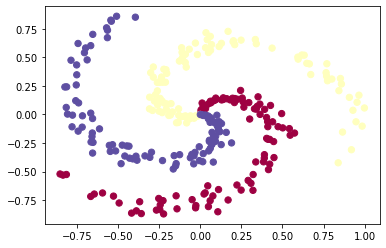

0 tensor(3434.1057, grad_fn=<SumBackward0>)
10000 tensor(3.9940e+12, grad_fn=<SumBackward0>)
20000 tensor(1.4376e+16, grad_fn=<SumBackward0>)
30000 tensor(5.0043e+19, grad_fn=<SumBackward0>)
40000 tensor(1.7420e+23, grad_fn=<SumBackward0>)
50000 tensor(6.0639e+26, grad_fn=<SumBackward0>)
60000 tensor(2.1108e+30, grad_fn=<SumBackward0>)
70000 tensor(7.3478e+33, grad_fn=<SumBackward0>)
80000 tensor(2.5578e+37, grad_fn=<SumBackward0>)
90000 tensor(inf, grad_fn=<SumBackward0>)


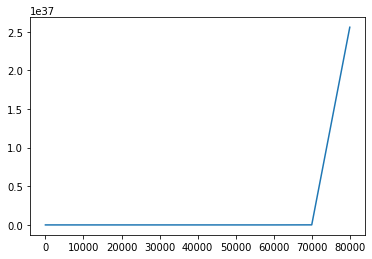

The number of misclassified examples:  tensor(200)


In [71]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

dtype = torch.FloatTensor 
#augment input vectors
x1 = Variable(torch.from_numpy(X).type(dtype), requires_grad = False)
el1 = torch.cat((torch.ones(100),torch.zeros(200)),0)
el2 = torch.cat((torch.zeros(100), torch.ones(100),torch.zeros(100)),0)
el3 = torch.cat((torch.zeros(200),torch.ones(100)),0)
yy  = torch.stack((el1,el2,el3),1)
y1 = Variable(torch.stack((el1,el2,el3),1), requires_grad = False)
h = 50 # size of hidden layer
w1 = Variable(0.5* torch.randn(D,h), requires_grad = True)
b1 = Variable(torch.randn(1,h), requires_grad = True)
w2 = Variable(0.5* torch.randn(h,K), requires_grad = True)
b2 = Variable(torch.randn((1,K)), requires_grad = True)

# some hyperparameters
# learning rates [0.1, 0.1e-8]. 

##learning_rate = 5e-6
learning_rate = 0.1

epochs = 100000
# gradient descent loop
num_examples = x1.shape[0]
loss_values = []
index_batch = []

for i in range(epochs):
##for i in range(30000):
  
  # Forward pass
    hout = x1.mm(w1) + b1
    h_relu = hout.clamp(min=0)
    output = h_relu.mm(w2) + b2# output of NN
    #scores = output.clamp(min=0)
    scores = output
  
  # compute the loss
    loss = (scores - y1).pow(2).sum()
    if i % 10000 == 0:
        print (i, loss)
        ##loss_values.append(loss)
        loss.backward()
        loss_values.append(loss.detach().numpy())
        index_batch.append(i)
        ##plt.plot(i, loss)
        ##plt.show()
    ##loss.backward()
  
  # perform a parameter update
    w2.data -= learning_rate * w2.grad.data
    w1.data -= learning_rate * w1.grad.data
    b2.data -= learning_rate * b2.grad.data
    b1.data -= learning_rate * b1.grad.data
    w1.grad.data.zero_()#Manually zero the gradient after the backward pass
    w2.grad.data.zero_()
    b2.grad.data.zero_()
    b1.grad.data.zero_()

##plt.plot(loss_values)
plt.plot(index_batch, loss_values)
##print(loss_values)
plt.show()

# evaluate training set accuracy
desired_class = torch.cat((torch.zeros(100),torch.ones(100), torch.add(torch.ones(100),1)),0)
hout = x1.mm(w1) + b1
h_relu = hout.clamp(min=0)
output = h_relu.mm(w2) + b2
#scores = output.clamp(min=0)
scores = output
predicted_class = torch.max(scores,1)
predictedClass = np.asarray(predicted_class[1])
predictedTC = torch.FloatTensor(predictedClass)
#print(predicted_class[1])
predicted = torch.squeeze(predictedTC)
err = torch.eq(desired_class, predicted)
error = N*K -torch.sum(err)
print('The number of misclassified examples: ',error)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

dtype = torch.FloatTensor 
#augment input vectors
x1 = Variable(torch.from_numpy(X).type(dtype), requires_grad = False)
el1 = torch.cat((torch.ones(100),torch.zeros(200)),0)
el2 = torch.cat((torch.zeros(100), torch.ones(100),torch.zeros(100)),0)
el3 = torch.cat((torch.zeros(200),torch.ones(100)),0)
yy  = torch.stack((el1,el2,el3),1)
y1 = Variable(torch.stack((el1,el2,el3),1), requires_grad = False)
h = 50 # size of hidden layer
w1 = Variable(0.5* torch.randn(D,h), requires_grad = True)
b1 = Variable(torch.randn(1,h), requires_grad = True)
w2 = Variable(0.5* torch.randn(h,K), requires_grad = True)
b2 = Variable(torch.randn((1,K)), requires_grad = True)

# some hyperparameters
# learning rates [0.1, 0.1e-8]. 

learning_rate = 5e-6
##learning_rate = 0.1
# gradient descent loop
num_examples = x1.shape[0]
##loss_values = []

for i in range(100000):
##for i in range(30000):
  
  # Forward pass
    hout = x1.mm(w1) + b1
    h_relu = hout.clamp(min=0)
    output = h_relu.mm(w2) + b2# output of NN
    #scores = output.clamp(min=0)
    scores = output
  
  # compute the loss
    loss = (scores - y1).pow(2).sum()
    if i % 10000 == 0:
        print (i, loss)
        ##loss_values.append(loss)
        ##plt.plot(i, loss)
        ##plt.show()
    loss.backward()
  
  # perform a parameter update
    w2.data -= learning_rate * w2.grad.data
    w1.data -= learning_rate * w1.grad.data
    b2.data -= learning_rate * b2.grad.data
    b1.data -= learning_rate * b1.grad.data
    w1.grad.data.zero_()#Manually zero the gradient after the backward pass
    w2.grad.data.zero_()
    b2.grad.data.zero_()
    b1.grad.data.zero_()

##plt.plot(loss_values)
##print(loss_values)
plt.show()

# evaluate training set accuracy
desired_class = torch.cat((torch.zeros(100),torch.ones(100), torch.add(torch.ones(100),1)),0)
hout = x1.mm(w1) + b1
h_relu = hout.clamp(min=0)
output = h_relu.mm(w2) + b2
#scores = output.clamp(min=0)
scores = output
predicted_class = torch.max(scores,1)
predictedClass = np.asarray(predicted_class[1])
predictedTC = torch.FloatTensor(predictedClass)
#print(predicted_class[1])
predicted = torch.squeeze(predictedTC)
err = torch.eq(desired_class, predicted)
error = N*K -torch.sum(err)
print('The number of misclassified examples: ',error)
  

epoch: 0,  loss: 1.08367276
epoch: 10,  loss: 1.04627395
epoch: 20,  loss: 1.01156151
epoch: 30,  loss: 0.98126471
epoch: 40,  loss: 0.95215511
epoch: 50,  loss: 0.92295420
epoch: 60,  loss: 0.89353925
epoch: 70,  loss: 0.86327541
epoch: 80,  loss: 0.83172464
epoch: 90,  loss: 0.79826993
epoch: 100,  loss: 0.76338613
epoch: 110,  loss: 0.72788066
epoch: 120,  loss: 0.69228566
epoch: 130,  loss: 0.65666705
epoch: 140,  loss: 0.62144196
epoch: 150,  loss: 0.58702123
epoch: 160,  loss: 0.55397272
epoch: 170,  loss: 0.52241117
epoch: 180,  loss: 0.49236694
epoch: 190,  loss: 0.46394151
tensor(0.9133)
tensor(0.8929)


Text(0.5, 0, 'epoch')

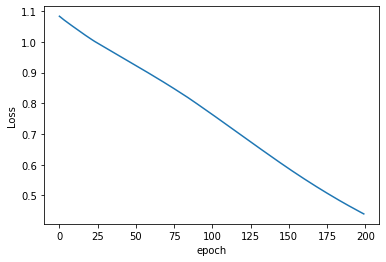

In [ ]:
## This example illustrates the use of nn package for building and training NNs. Wine data example is used for illustration

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim


# Load the data
##wine = np.loadtxt('data/wine.txt', delimiter =',')
##wine = np.loadtxt('/content/wine_.txt', delimiter =',')
wine = np.loadtxt('/content/wine.txt', delimiter =',')

#We will randomly shuffle the data first. This is needed because we want to mix rows of different class labels
np.random.shuffle(wine)
# Next, we convert convert data to torch tensor
wine_t = torch.from_numpy(wine).float()
#Separate target and data. First column is the target column
wine_target = wine_t[:,0].long()# Target needs to be a long tensor
##print(wine_target)
data = wine_t[:,1:]# The data has 13 features
##print(data)
# Let's normalize the data
data_mean = torch.mean(data, dim=0)
data_var = torch.var(data, dim=0)
data_norm = (data - data_mean)/torch.sqrt(data_var)

# Let us partition the data into training and test sets, We will use 150 examples for training and the remaining 28 for testing
X_train = data_norm[0:150]
X_test = data_norm[150:178]
y_train = wine_target[0:150]-1# Impp PyTorch expects labels as 0, 1, and 2 for a three class problem and not as 1, 2, 3 as present in the wine data
y_test  = wine_target[150:178]-1# Impp PyTorch expects labels as 0, 1, and 2 for a three class problem and not as 1, 2, 3 as prese

class Model(nn.Module):
    def __init__(self, input_features=13, hidden_layer1=10, output_features=3):
        super().__init__()
        self.fc1 = nn.Linear(input_features,hidden_layer1)                                    
        self.out = nn.Linear(hidden_layer1, output_features)      
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.out(x)
        return x
    
# Note the second layer is using no activation which is equivalent to linear activation.
mymodel = Model().float()
#mymodel=mymodel.float()
# We will use cross-entropy loss and SGD with momentum
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(mymodel.parameters(), lr = 0.0005, momentum=0.5)
epochs = 200
batch_size = 10
losses = []
for epoch in range(epochs):
    for i in range((X_train.shape[0] - 1) // batch_size + 1):
        start_i = i * batch_size
        end_i = start_i + batch_size
        xb = X_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        y_pred = mymodel.forward(xb.float())
        loss = criterion(y_pred, yb.long())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    losses.append(loss.detach().numpy())
    if epoch % 10 == 0:
        print(f'epoch: {epoch},  loss: {loss.item():10.8f}')


# Define function for accuracy calculation
def accuracy(out, yb):
    preds = torch.argmax(out,1)
    return (preds == yb).float().mean()
# Training Accuracy
preds = mymodel.forward(X_train.float())
print(accuracy(preds,y_train.long()))

# Testing Accuracy
preds = mymodel.forward(X_test.float())
print(accuracy(preds,y_test.long()))

import matplotlib.pyplot as plt
plt.plot(range(epochs), losses)
#print(losses.detach().numpy())
####print(type(losses))
#print(np.array(losses))
#plt.plot(losses)
plt.ylabel('Loss')
plt.xlabel('epoch')


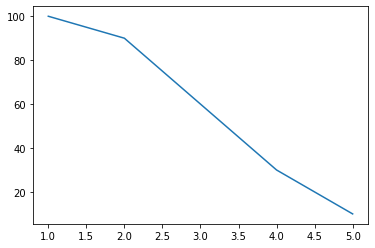

In [ ]:
import matplotlib.pyplot as plt

def my_plot(epochs, loss):
    plt.plot(epochs, loss)
    
def train(num_epochs,optimizer,criterion,model):
    loss_vals=  []
    for epoch in range(num_epochs):
        epoch_loss= []
        for i, (images, labels) in enumerate(trainloader):
            # rest of the code
            loss.backward()
            epoch_loss.append(loss.item())
            # rest of the code
        # rest of the code
        loss_vals.append(sum(epoch_loss)/len(epoch_loss))
        # rest of the code
    
    # plotting
    my_plot(np.linspace(1, num_epochs, num_epochs).astype(int), loss_vals)

my_plot([1, 2, 3, 4, 5], [100, 90, 60, 30, 10])

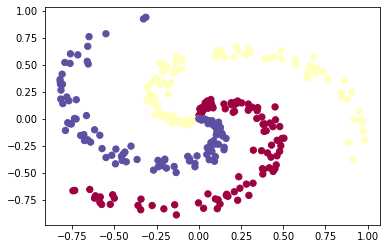

0 tensor(5936.9619, grad_fn=<SumBackward0>)
10000 tensor(93.2257, grad_fn=<SumBackward0>)
20000 tensor(68.4266, grad_fn=<SumBackward0>)
30000 tensor(53.8491, grad_fn=<SumBackward0>)
40000 tensor(45.2629, grad_fn=<SumBackward0>)
50000 tensor(40.0901, grad_fn=<SumBackward0>)
60000 tensor(36.2277, grad_fn=<SumBackward0>)
70000 tensor(33.2901, grad_fn=<SumBackward0>)
80000 tensor(31.0033, grad_fn=<SumBackward0>)
90000 tensor(29.0973, grad_fn=<SumBackward0>)
[]
The number of misclassified examples:  tensor(5)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

dtype = torch.FloatTensor 
#augment input vectors
x1 = Variable(torch.from_numpy(X).type(dtype), requires_grad = False)
el1 = torch.cat((torch.ones(100),torch.zeros(200)),0)
el2 = torch.cat((torch.zeros(100), torch.ones(100),torch.zeros(100)),0)
el3 = torch.cat((torch.zeros(200),torch.ones(100)),0)
yy  = torch.stack((el1,el2,el3),1)
y1 = Variable(torch.stack((el1,el2,el3),1), requires_grad = False)
h = 50 # size of hidden layer
w1 = Variable(0.5* torch.randn(D,h), requires_grad = True)
b1 = Variable(torch.randn(1,h), requires_grad = True)
w2 = Variable(0.5* torch.randn(h,K), requires_grad = True)
b2 = Variable(torch.randn((1,K)), requires_grad = True)

# some hyperparameters
# learning rates [0.1, 0.1e-8]. 

learning_rate = 5e-6
##learning_rate = 0.1
# gradient descent loop
num_examples = x1.shape[0]
##loss_values = []

for i in range(100000):
##for i in range(30000):
  
  # Forward pass
    hout = x1.mm(w1) + b1
    h_relu = hout.clamp(min=0)
    output = h_relu.mm(w2) + b2# output of NN
    #scores = output.clamp(min=0)
    scores = output
  
  # compute the loss
    loss = (scores - y1).pow(2).sum()
    if i % 10000 == 0:
        print (i, loss)
        ##loss_values.append(loss)
        ##plt.plot(i, loss)
        ##plt.show()
    loss.backward()
  
  # perform a parameter update
    w2.data -= learning_rate * w2.grad.data
    w1.data -= learning_rate * w1.grad.data
    b2.data -= learning_rate * b2.grad.data
    b1.data -= learning_rate * b1.grad.data
    w1.grad.data.zero_()#Manually zero the gradient after the backward pass
    w2.grad.data.zero_()
    b2.grad.data.zero_()
    b1.grad.data.zero_()

##plt.plot(loss_values)
##print(loss_values)
plt.show()

# evaluate training set accuracy
desired_class = torch.cat((torch.zeros(100),torch.ones(100), torch.add(torch.ones(100),1)),0)
hout = x1.mm(w1) + b1
h_relu = hout.clamp(min=0)
output = h_relu.mm(w2) + b2
#scores = output.clamp(min=0)
scores = output
predicted_class = torch.max(scores,1)
predictedClass = np.asarray(predicted_class[1])
predictedTC = torch.FloatTensor(predictedClass)
#print(predicted_class[1])
predicted = torch.squeeze(predictedTC)
err = torch.eq(desired_class, predicted)
error = N*K -torch.sum(err)
print('The number of misclassified examples: ',error)
  

epoch: 0,  loss: 1.10468876
epoch: 10,  loss: 1.05298924
epoch: 20,  loss: 1.00536799
epoch: 30,  loss: 0.95880461
epoch: 40,  loss: 0.91288149
epoch: 50,  loss: 0.86709052
epoch: 60,  loss: 0.82094133
epoch: 70,  loss: 0.77374971
epoch: 80,  loss: 0.72458124
epoch: 90,  loss: 0.67532057
epoch: 100,  loss: 0.62664181
epoch: 110,  loss: 0.57930076
epoch: 120,  loss: 0.53399706
epoch: 130,  loss: 0.49131924
epoch: 140,  loss: 0.45148554
epoch: 150,  loss: 0.41468510
epoch: 160,  loss: 0.38092518
epoch: 170,  loss: 0.35036805
epoch: 180,  loss: 0.32281765
epoch: 190,  loss: 0.29809362
tensor(0.9733)
tensor(0.9286)


Text(0.5, 0, 'epoch')

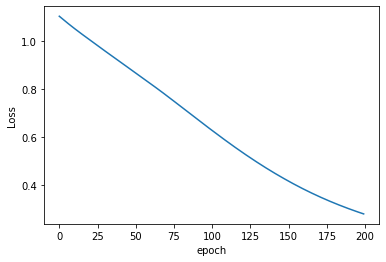

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim

# Load the data
##wine = np.loadtxt('data/wine.txt', delimiter =',')
wine = np.loadtxt('/content/wine.txt', delimiter =',')

#We will randomly shuffle the data first. This is needed because we want to mix rows of different class labels
np.random.shuffle(wine)
# Next, we convert convert data to torch tensor
wine_t = torch.from_numpy(wine).float()
#Separate target and data. First column is the target column
wine_target = wine_t[:,0].long()# Target needs to be a long tensor
data = wine_t[:,1:]# The data has 13 features
# Let's normalize the data
data_mean = torch.mean(data, dim=0)
data_var = torch.var(data, dim=0)
data_norm = (data - data_mean)/torch.sqrt(data_var)

# Let us partition the data into training and test sets, We will use 150 examples for training and the remaining 28 for testing
X_train = data_norm[0:150]
X_test = data_norm[150:178]
y_train = wine_target[0:150]-1# Impp PyTorch expects labels as 0, 1, and 2 for a three class problem and not as 1, 2, 3 as present in the wine data
y_test  = wine_target[150:178]-1# Impp PyTorch expects labels as 0, 1, and 2 for a three class problem and not as 1, 2, 3 as presen

class Model(nn.Module):
    def __init__(self, input_features=13, hidden_layer1=10, output_features=3):
        super().__init__()
        self.fc1 = nn.Linear(input_features,hidden_layer1)                                    
        self.out = nn.Linear(hidden_layer1, output_features)      
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.out(x)
        return x
    
# Note the second layer is using no activation which is equivalent to linear activation.

mymodel = Model().float()
#mymodel=mymodel.float()

# We will use cross-entropy loss and SGD with momentum
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(mymodel.parameters(), lr = 0.0005, momentum=0.5)

epochs = 200
batch_size = 10
losses = []
for epoch in range(epochs):
    for i in range((X_train.shape[0] - 1) // batch_size + 1):
        start_i = i * batch_size
        end_i = start_i + batch_size
        xb = X_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        y_pred = mymodel.forward(xb.float())
        loss = criterion(y_pred, yb.long())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    losses.append(loss.detach().numpy())
    if epoch % 10 == 0:
        print(f'epoch: {epoch},  loss: {loss.item():10.8f}')


# Define function for accuracy calculation
def accuracy(out, yb):
    preds = torch.argmax(out,1)
    return (preds == yb).float().mean()



# Training Accuracy
preds = mymodel.forward(X_train.float())
print(accuracy(preds,y_train.long()))

# Testing Accuracy
preds = mymodel.forward(X_test.float())
print(accuracy(preds,y_test.long()))

import matplotlib.pyplot as plt
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')



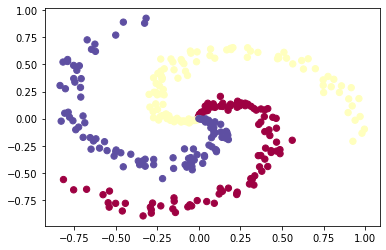

iteration 0: loss 1.098769
iteration 1000: loss 0.289806
iteration 2000: loss 0.269118
iteration 3000: loss 0.250366
iteration 4000: loss 0.244244
iteration 5000: loss 0.242071
iteration 6000: loss 0.241125
iteration 7000: loss 0.240699
iteration 8000: loss 0.240463
iteration 9000: loss 0.240328
training accuracy: 0.99


(-1.899082874617827, 1.9209171253821764)

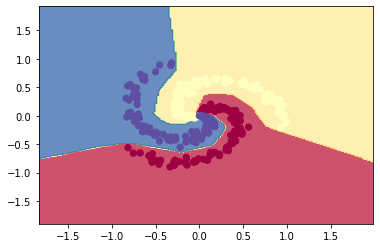

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

#initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):
  
  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print ("iteration %d: loss %f" % (i, loss))
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)
  
  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2


  # evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')

0 tensor(1.5843, grad_fn=<NllLossBackward0>)
1 tensor(0.9005, grad_fn=<NllLossBackward0>)
2 tensor(0.7814, grad_fn=<NllLossBackward0>)
3 tensor(0.7442, grad_fn=<NllLossBackward0>)
4 tensor(0.7314, grad_fn=<NllLossBackward0>)
5 tensor(0.7235, grad_fn=<NllLossBackward0>)
6 tensor(0.7174, grad_fn=<NllLossBackward0>)
7 tensor(0.7125, grad_fn=<NllLossBackward0>)
8 tensor(0.7103, grad_fn=<NllLossBackward0>)
9 tensor(0.7080, grad_fn=<NllLossBackward0>)
10 tensor(0.7059, grad_fn=<NllLossBackward0>)
11 tensor(0.7039, grad_fn=<NllLossBackward0>)
12 tensor(0.7019, grad_fn=<NllLossBackward0>)
13 tensor(0.7000, grad_fn=<NllLossBackward0>)
14 tensor(0.6984, grad_fn=<NllLossBackward0>)
15 tensor(0.6967, grad_fn=<NllLossBackward0>)
16 tensor(0.6953, grad_fn=<NllLossBackward0>)
17 tensor(0.6937, grad_fn=<NllLossBackward0>)
18 tensor(0.6924, grad_fn=<NllLossBackward0>)
19 tensor(0.6910, grad_fn=<NllLossBackward0>)
20 tensor(0.6898, grad_fn=<NllLossBackward0>)
21 tensor(0.6885, grad_fn=<NllLossBackward0>

Text(0.5, 0, 'epoch')

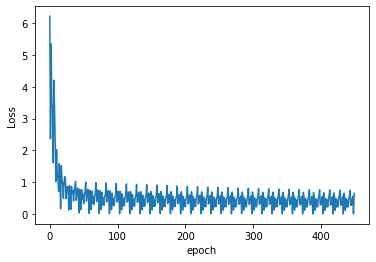

In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Load the data
##wine = np.loadtxt('data/wine.txt', delimiter =',')
wine = np.loadtxt('/content/wine.txt', delimiter =',')

#We will randomly shuffle the data first. This is needed because we want to mix rows of different class labels
np.random.shuffle(wine)
# Next, we convert data to torch tensor
wine_t = torch.from_numpy(wine).float()
##wine_t.detach().numpy()
##wine_t = wine_t.detach().numpy()
#Separate target and data. First column is the target column
wine_target = wine_t[:,0].long()# Target needs to be a long tensor
data = wine_t[:,1:]# The data has 13 features
# Let's normalize the data
data_mean = torch.mean(data, dim=0)
data_var = torch.var(data, dim=0)
data_norm = (data - data_mean)/torch.sqrt(data_var)

# Let us partition the data into training and test sets, We will use 150 examples for training and the remaining 28 for testing
X_train = data_norm[0:150]
X_test = data_norm[150:178]
y_train = wine_target[0:150]-1# Impp PyTorch expects labels as 0, 1, and 2 for a three class problem and not as 1, 2, 3 as present in the wine data
y_test  = wine_target[150:178]-1# Impp PyTorch expects labels as 0, 1, and 2 for a three class problem and not as 1, 2, 3 as prese

# Define the network. We will use a two-layer network with Relu nonlinearities
def mlp(X):
    net1 = X@weights1 + bias1
    h1 = torch.relu(net1)
    net2 = h1@weights2 + bias2
    output = torch.relu(net2)
    return output
model = mlp

# Initialize weights
weights1 = torch.randn(13,10)
##print(type(weights1))
##print(weights1)
weights1.requires_grad_()
weights1.detach().numpy()
##print(weights1.detach().numpy())
bias1 = torch.zeros(10, requires_grad=True)
##bias1.detach().numpy()
weights2 = torch.randn(10,3)
weights2.requires_grad_()
##weights2.detach().numpy()
bias2 = torch.zeros(3, requires_grad=True)
##bias2.detach().numpy()

#Define a loss function. We will use the cross entropy loss function
loss_func = F.cross_entropy# Requires 2 arguments, prediction array and target array

# Define function for accuracy calculation
def accuracy(out, yb):
    preds = torch.argmax(out,1)
    return (preds == yb).float().mean()


lr = 0.05 # learning rate
epochs = 30  # how many epochs to train for
batch_size = 10
losses =[]
for epoch in range(epochs):
    for i in range((X_train.shape[0] - 1) // batch_size + 1):
        start_i = i * batch_size
        end_i = start_i + batch_size
        xb = X_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = mlp(xb)
        loss = loss_func(pred, yb)
        losses.append(loss.detach().numpy()) 
        loss.backward()
        with torch.no_grad():
            weights1 -= weights1.grad * lr
            bias1 -= bias1.grad * lr
            weights2 -= weights2.grad * lr
            bias2 -= bias2.grad * lr
            weights1.grad.zero_()
            bias1.grad.zero_()
            weights2.grad.zero_()
            bias2.grad.zero_()       
    print(epoch, loss)


pred_train = mlp(X_train)
print(accuracy(pred_train,y_train))

pred_test = mlp(X_test)
print(accuracy(pred_test,y_test))

import matplotlib.pyplot as plt
plt.plot(range(epochs*15), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')




In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
# Load the data
##wine = np.loadtxt('data/wine.txt', delimiter =',')
wine = np.loadtxt('/content/wine.txt', delimiter =',')
#We will randomly shuffle the data first. This is needed because we want to mix rows of different class labels
np.random.shuffle(wine)
# Next, we convert convert data to torch tensor
wine_t = torch.from_numpy(wine).float()
#Separate target and data. First column is the target column
wine_target = wine_t[:,0].long()# Target needs to be a long tensor
data = wine_t[:,1:]# The data has 13 features
# Let's normalize the data
data_mean = torch.mean(data, dim=0)
data_var = torch.var(data, dim=0)
data_norm = (data - data_mean)/torch.sqrt(data_var)
# Let us partition the data into training and test sets, We will use 150 examples for training and the remaining 28 for testing
X_train = data_norm[0:150]
X_test = data_norm[150:178]
y_train = wine_target[0:150]-1# Impp PyTorch expects labels as 0, 1, and 2 for a three class problem and not as 1, 2, 3 as present in the wine data
y_test  = wine_target[150:178]-1# Impp PyTorch expects labels as 0, 1, and 2 for a three class problem and not as 1, 2, 3 as present in the wine data
# Define the network. We will use a two-layer network with Relu nonlinearities
def mlp(X):
    net1 = X@weights1 + bias1
    h1 = torch.relu(net1)
    net2 = h1@weights2 + bias2
    output = torch.relu(net2)
    return output
model = mlp
# Initialize weights
weights1 = torch.randn(13,10)
weights1.requires_grad_()
bias1 = torch.zeros(10, requires_grad=True)
weights2 = torch.randn(10,3)
weights2.requires_grad_()
bias2 = torch.zeros(3, requires_grad=True)
#Define a loss function. We will use the cross entropy loss function
loss_func = F.cross_entropy# Requires 2 arguments, prediction array and target array
# Define function for accuracy calculation
def accuracy(out, yb):
    preds = torch.argmax(out,1)
    return (preds == yb).float().mean()
lr = 0.05 # learning rate
epochs = 30  # how many epochs to train for
batch_size = 10
losses =[]
for epoch in range(epochs):
    for i in range((X_train.shape[0] - 1) // batch_size + 1):
        start_i = i * batch_size
        end_i = start_i + batch_size
        xb = X_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = mlp(xb)
        loss = loss_func(pred, yb)
        losses.append(loss.detach().numpy()) 
        loss.backward()
        with torch.no_grad():
            weights1 -= weights1.grad * lr
            bias1 -= bias1.grad * lr
            weights2 -= weights2.grad * lr
            bias2 -= bias2.grad * lr
            weights1.grad.zero_()
            bias1.grad.zero_()
            weights2.grad.zero_()
            bias2.grad.zero_()       
    print(epoch, loss)

0 tensor(1.9465, grad_fn=<NllLossBackward0>)
1 tensor(1.1171, grad_fn=<NllLossBackward0>)
2 tensor(0.7584, grad_fn=<NllLossBackward0>)
3 tensor(0.5896, grad_fn=<NllLossBackward0>)
4 tensor(0.5134, grad_fn=<NllLossBackward0>)
5 tensor(0.4829, grad_fn=<NllLossBackward0>)
6 tensor(0.4603, grad_fn=<NllLossBackward0>)
7 tensor(0.4435, grad_fn=<NllLossBackward0>)
8 tensor(0.4306, grad_fn=<NllLossBackward0>)
9 tensor(0.4130, grad_fn=<NllLossBackward0>)
10 tensor(0.3682, grad_fn=<NllLossBackward0>)
11 tensor(0.3433, grad_fn=<NllLossBackward0>)
12 tensor(0.3247, grad_fn=<NllLossBackward0>)
13 tensor(0.3076, grad_fn=<NllLossBackward0>)
14 tensor(0.2587, grad_fn=<NllLossBackward0>)
15 tensor(0.2208, grad_fn=<NllLossBackward0>)
16 tensor(0.1918, grad_fn=<NllLossBackward0>)
17 tensor(0.1828, grad_fn=<NllLossBackward0>)
18 tensor(0.1712, grad_fn=<NllLossBackward0>)
19 tensor(0.1654, grad_fn=<NllLossBackward0>)
20 tensor(0.1610, grad_fn=<NllLossBackward0>)
21 tensor(0.1562, grad_fn=<NllLossBackward0>

In [ ]:
pred_train = mlp(X_train)
print(accuracy(pred_train,y_train))

tensor(0.9867)


In [ ]:
pred_test = mlp(X_test)
print(accuracy(pred_test,y_test))

tensor(0.9643)


Text(0.5, 0, 'epoch')

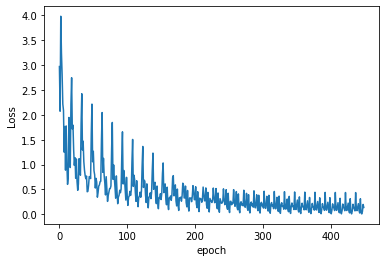

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(epochs*15), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [ ]:
print(losses[0].detach().numpy())

1.6307957


4422102/4422102 [==============================] - 0s 0us/step


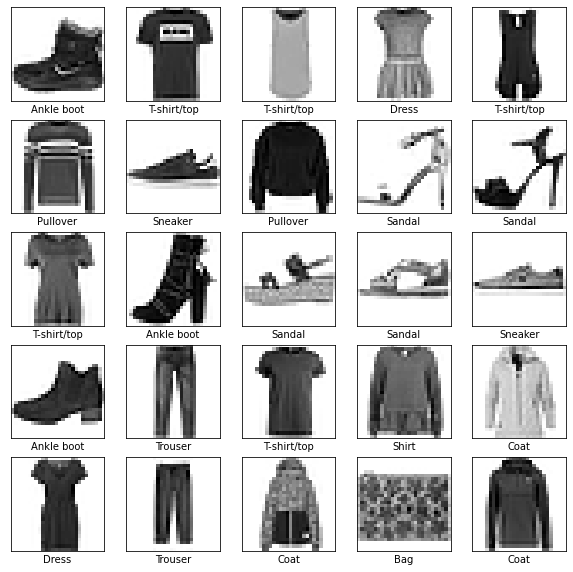

Epoch 1/10
2000/2000 [==============================] - 12s 6ms/step - loss: 0.4729 - acc: 0.8305 - val_loss: 0.4946 - val_acc: 0.8108
Epoch 2/10
2000/2000 [==============================] - 11s 6ms/step - loss: 0.3593 - acc: 0.8679 - val_loss: 0.3884 - val_acc: 0.8600
Epoch 3/10
2000/2000 [==============================] - 15s 8ms/step - loss: 0.3213 - acc: 0.8814 - val_loss: 0.3689 - val_acc: 0.8615
Epoch 4/10
2000/2000 [==============================] - 18s 9ms/step - loss: 0.2979 - acc: 0.8907 - val_loss: 0.3314 - val_acc: 0.8790
Epoch 5/10
2000/2000 [==============================] - 13s 6ms/step - loss: 0.2807 - acc: 0.8968 - val_loss: 0.3505 - val_acc: 0.8713
Epoch 6/10
2000/2000 [==============================] - 13s 6ms/step - loss: 0.2640 - acc: 0.9018 - val_loss: 0.3285 - val_acc: 0.8820
Epoch 7/10
2000/2000 [==============================] - 12s 6ms/step - loss: 0.2519 - acc: 0.9072 - val_loss: 0.3287 - val_acc: 0.8802
Epoch 8/10
2000/2000 [==============================] -

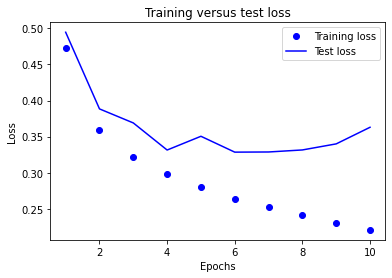

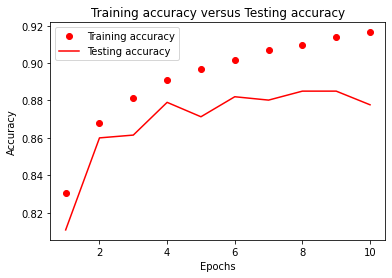

In [ ]:
#hw6_part1_2_3
from keras.datasets import fashion_mnist
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

#fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
	keras.layers.Dense(500, activation=tf.nn.relu),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

#Train and evaluate model:        
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size = 30, epochs = 10,  verbose=1)
results = model.evaluate(x_test, y_test, verbose=2)
print(results)

history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Test loss')
plt.title('Training versus test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc, 'ro', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label= 'Testing accuracy')
plt.title('Training accuracy versus Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



Result: y = -0.14695233446519113 + -0.5006634382650733 x + -2.7971451471335804 x^2 + 0.07750693781535295 x^3 + 0.3984491433107182 x^4


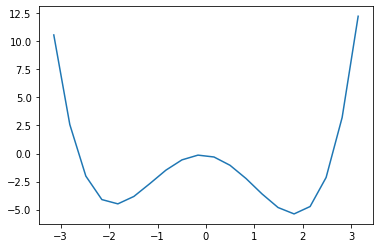

In [ ]:
## Q1
## 
## To build a linear regression model 
##
## learning_rate:     {1e-6, 1e-5, 1e-4}
## polynomial_degree: {2, 3, 4}



import numpy as np
import math
import matplotlib.pyplot as plt
import numpy as np
# if using a jupyter notebook
%matplotlib inline    



# Create random input and output data
x = np.linspace(-math.pi, math.pi, 20)
y = np.sin(x) + np.random.normal(0, 1, 20)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()
e = np.random.randn()

learning_rate = 1e-4
for t in range(20):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    #y_pred = a + b * x + c * x ** 2
    #y_pred = a + b * x + c * x ** 2 + d * x ** 3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3 + e * x ** 4

    loss = np.square(y_pred - y).sum()

    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()
    grad_e = (grad_y_pred * x ** 4).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d
    e -= learning_rate * grad_d

#print(f'Result: y = {a} + {b} x + {c} x^2')
#print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')
print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3 + {e} x^4')

plt.plot(x, y_pred)
plt.show()



In [ ]:
## Q2
## 
## To build the model using the gradient search 
##
## input:   fertilizers and insecticides
## output:  predicted corn yield  

import numpy as np 
from numpy import linalg as LA

X = np.array([[6, 4], [10, 4], [12, 5], [14, 7], [16, 9], [18, 12], [22, 14], [24, 20], [26, 21], [32, 24]])
Y = np.array([40, 44, 46, 48, 52, 58, 60, 68, 74, 80])

alpha = 0.000075
w_old = np.array([-0.5, 0.7])

for i in range (5):
  err = Y - np.matmul(w_old, X.T)
  grad_old = -np.matmul(err, X)
  w_new = w_old - alpha * grad_old
  w_old = w_new

# accept input of space seperated numbers
list = input().split()

for i in range(len(list)):
  list[i] = int(list[i])

arr = np.array(list)

x = np.array([arr])

y_pred = np.matmul(w_old, x.T)
print(y_pred[0])


22 15
59.14763714091853


In [ ]:
## Q3
## 
## The pseudo-inverse approach for the prediction model 
##
## input:   fertilizers and insecticides
## output:  predicted corn yield 

import numpy as np 
from numpy import linalg as LA

X = np.array([[6, 4], [10, 4], [12, 5], [14, 7], [16, 9], [18, 12], [22, 14], [24, 20], [26, 21], [32, 24]])
Y = np.array([40, 44, 46, 48, 52, 58, 60, 68, 74, 80])

B = LA.lstsq(X,Y)

# accept input of space seperated numbers
list = input().split()

for i in range(len(list)):
  list[i] = int(list[i])

arr = np.array(list)

x = np.array([arr])
y_pred = np.matmul(x, B[0])
print(y_pred[0])


<ipython-input-38-787cdfa0f9d8>:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  B = LA.lstsq(X,Y)


22 15
65.91718272028655


In [ ]:
B

(array([ 4.80183541, -2.64821309]),
 array([763.78333209]),
 2,
 array([75.64737694,  6.1216307 ]))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


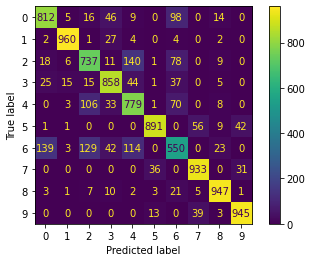

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1000
           1       0.97      0.96      0.96      1000
           2       0.73      0.74      0.73      1000
           3       0.84      0.86      0.85      1000
           4       0.71      0.78      0.74      1000
           5       0.94      0.89      0.92      1000
           6       0.64      0.55      0.59      1000
           7       0.90      0.93      0.92      1000
           8       0.93      0.95      0.94      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [ ]:
## Q4
## 
## To perform a recognition task using logistic regression with sklearn 
##

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import gzip
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

filePath_train_set = './train-images-idx3-ubyte.gz'
filePath_train_label = './train-labels-idx1-ubyte.gz'
filePath_test_set = './t10k-images-idx3-ubyte.gz'
filePath_test_label = './t10k-labels-idx1-ubyte.gz'

with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)
with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)


##X_train, X_test, y_train, y_test = train_test_split(trainSet, trainLabel, test_size = 0.2, random_state=None)
X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel

logi_regr = LogisticRegression(random_state=None)
logi_regr.fit(X_train, y_train)
y_pred = logi_regr.predict(X_test)

# compute accuracy of the model
logi_regr.score(X_test, y_test)

# Create a confusion matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

# Run the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


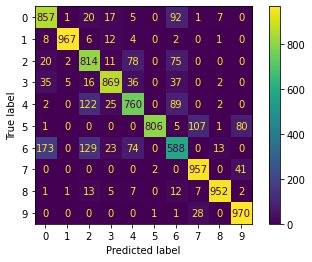

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.81      0.77      1000
           3       0.90      0.87      0.89      1000
           4       0.79      0.76      0.77      1000
           5       1.00      0.81      0.89      1000
           6       0.65      0.59      0.62      1000
           7       0.87      0.96      0.91      1000
           8       0.97      0.95      0.96      1000
           9       0.89      0.97      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



In [ ]:
## Q5
## 
## To perform a recognition task using k-NN classifier 
##
## k = {3, 5, 7}


import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import gzip
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

filePath_train_set = './train-images-idx3-ubyte.gz'
filePath_train_label = './train-labels-idx1-ubyte.gz'
filePath_test_set = './t10k-images-idx3-ubyte.gz'
filePath_test_label = './t10k-labels-idx1-ubyte.gz'

with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)
with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel

# train the model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
 
# compute accuracy of the model
knn.score(X_test, y_test)

# Create a confusion matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

# Run the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

